# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## Main routines

### Grid data

* `grid2d` - Open a `.zdf` grid file and produce a 2D (colormap) plot
* `vfield2d` - Open a 2 grid files and produce a field magnitude plot

### Particle data

* `part2D` - Open a `.zdf` particle file and produce a 2D (scatter) plot with the selected quantities
* `histogram` - Open a `.zdf` particle file and produce a histogram plot of the selected quantity

## Example

Visualize file `test-000000.zdf`:

```python
import visxd
visxd.grid2d( "test-000000.zdf" )
```


## Utilities

The following routines are meant to simplify access to specific quantities / timesteps:

* `plot_data( fld, iter, ...)` - Plots 1D / 2D scalar data. The parameter `fld` correponds to the complete file path up to the '-' character that separates the iteration number, e.g. "EMF/Jx".
* `plot_vfield2d( fld, iter, ...)` - Generates 2 plots, 1 for the magnitude of the in-plane field and another one for the out of plane field. The parameter `fld` correponds to the complete file path up to the character that specifies the field component, just befor the '-' character separates the iteration number, e.g. "EMF/B".

The iteration parameter, `iter`, will be converted to a six digit string of the usual format to create the complete file name. The routines also accept additional parameters that are passed on to the `visxd` backend, e.g.:

```python
plot_vfield2d( "EMF/E", xlim = (0., 2.))
```

In [29]:
import visxd
import os.path
import sys

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]

import matplotlib.colors as colors

def plot_data( fld, iter, xlim = None, ylim = None, grid = None, cmap = None, norm = None,
    vsim = None, vmin = None, vmax = None, scale = None ):
    
    file = "{}-{:06d}.zdf".format(fld, iter)

    if ( os.path.exists(file) ):
        print("Plotting {}".format(file))

        visxd.grid( file, xlim = xlim, ylim = ylim, grid = False, cmap = cmap, norm = norm,
            vsim = vsim, vmin = vmin, vmax = vmax, scale = scale )
    else:
        print("(*error*) file {} not found.".format(file), file = sys.stderr )

def plot_vfield2d( fld, iter, xlim = None, ylim = None, grid = False, norm = None ):
    print("Plotting {} in plane field for iteration {}.".format(fld,iter))
    
    filex = "{}x-{:06d}.zdf".format(fld, iter)
    filey = "{}y-{:06d}.zdf".format(fld, iter)

    visxd.vfield2d( filex, filey, xlim = xlim, ylim = ylim, grid = grid, cmap = 'YlOrBr',
        title = "In-plane {} field".format(fld) )
    
    filez = "{}z-{:06d}.zdf".format(fld, iter)

    if ( os.path.exists(filez) ):
        if ( not norm ):
            norm = colors.CenteredNorm()
        print("Plotting {} out of plane field for iteration {}.".format(fld,iter))
        visxd.grid2d(filez, xlim = xlim, ylim = ylim, grid = grid, cmap = 'BrBG', norm = colors.CenteredNorm())


## Weibel test

Plotting EMF/B in plane field for iteration 500.


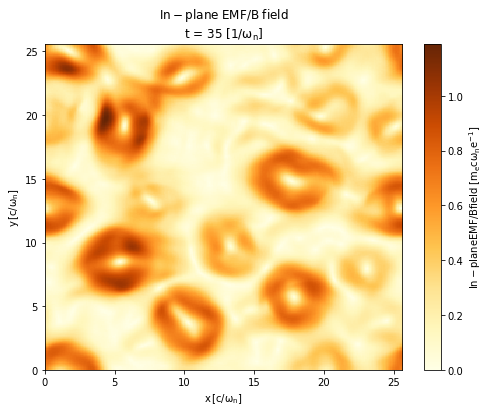

Plotting EMF/B out of plane field for iteration 500.


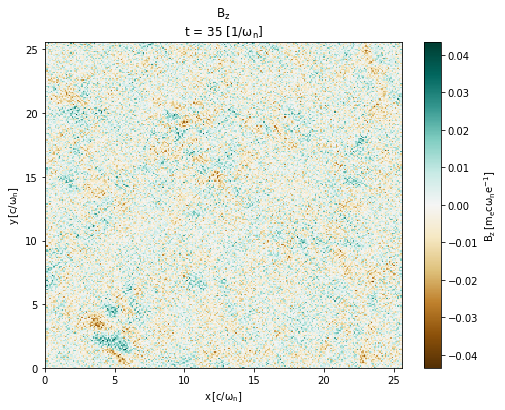

Plotting CURRENT/J in plane field for iteration 500.


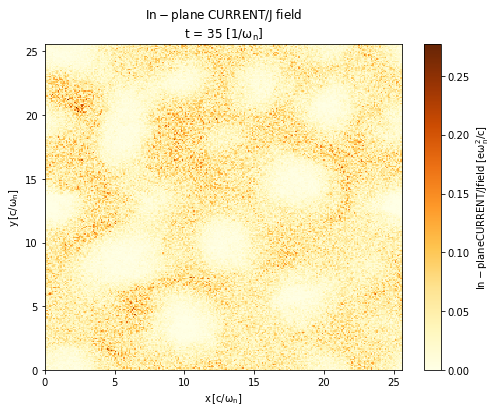

Plotting CURRENT/J out of plane field for iteration 500.


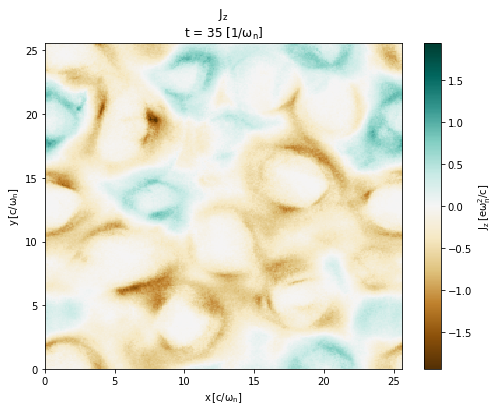

In [30]:
import matplotlib.colors as colors

#plot_data("PHASESPACE/electrons/electrons-uxuz", 0 )
#plot_data("PHASESPACE/positrons/positrons-uxuz", 0 )
plot_vfield2d("EMF/B", 500 )
plot_vfield2d("CURRENT/J", 500 )

## Moving window - laser test

Plotting EMF/Ey-000000.zdf


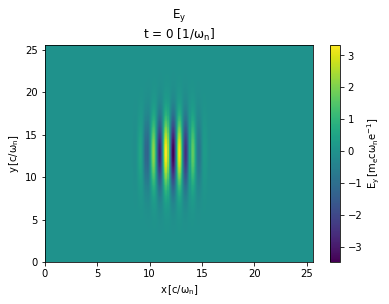

Plotting EMF/Ey-000050.zdf


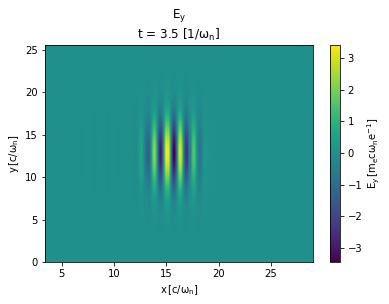

In [37]:
plot_data("EMF/Ey", 0)
plot_data("EMF/Ey", 50)

Plotting CHARGE/electrons/electrons-charge-000000.zdf


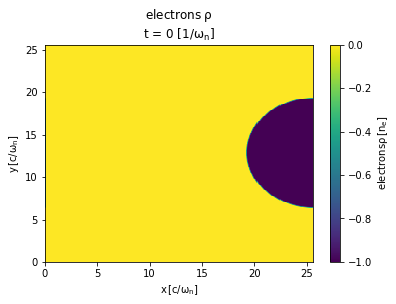

Plotting CHARGE/electrons/electrons-charge-000002.zdf


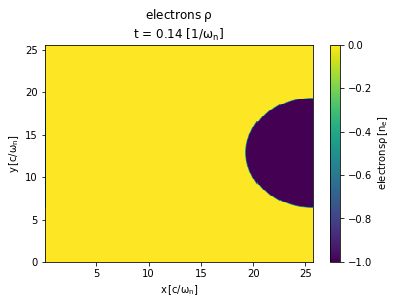

Plotting CHARGE/electrons/electrons-charge-000050.zdf


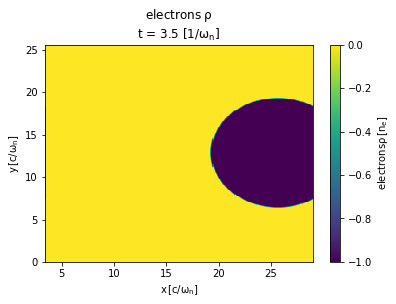

In [23]:
plot_data("CHARGE/electrons/electrons-charge", 0)
plot_data("CHARGE/electrons/electrons-charge", 2)
plot_data("CHARGE/electrons/electrons-charge", 50)

## LWFA Test

Plotting EMF/Ex-001572.zdf


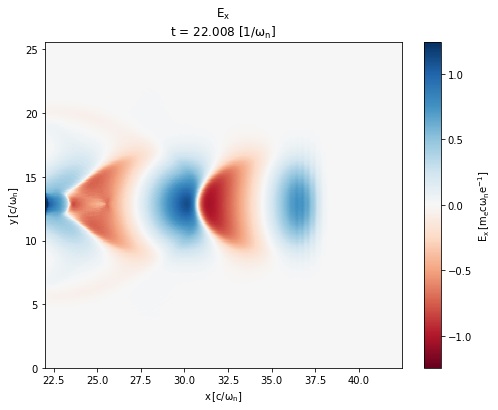

Plotting EMF/Ey-001572.zdf


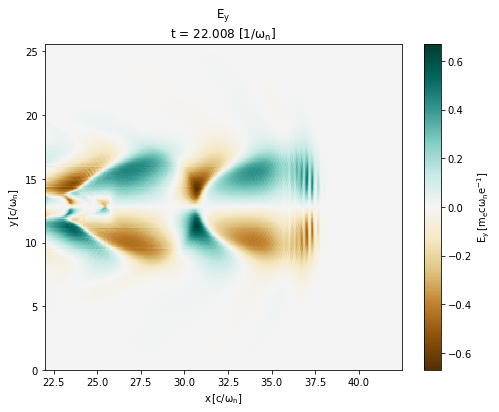

Plotting EMF/Ez-001572.zdf


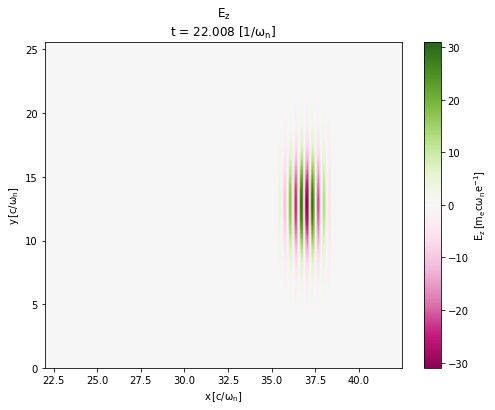

Plotting PHASESPACE/electrons/electrons-xux-001572.zdf


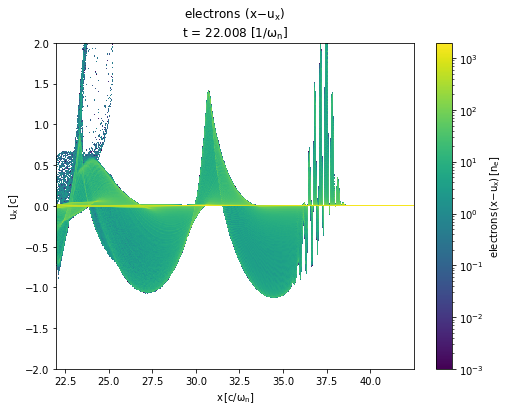

In [28]:
import matplotlib.colors as colors

plot_data("EMF/Ex",1572, cmap = "RdBu", norm = colors.CenteredNorm())
plot_data("EMF/Ey",1572, cmap = "BrBG", norm = colors.CenteredNorm())
plot_data("EMF/Ez",1572, cmap = "PiYG", norm = colors.CenteredNorm())

plot_data("PHASESPACE/electrons/electrons-xux", 1572, norm = colors.LogNorm( vmin = 0.001) )
#visxd.part2D( "PARTICLES/electrons/particles-electrons-001572.zdf", "x", "ux" )